In [2]:
# Importing Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('/home/joseph/Desktop/ml lab/lab1/dataset/Melbourne_housing_FULL.csv')
df.head(20)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [4]:
uniqueCounts = df.nunique();
print("Unique count across columns:")
print(uniqueCounts);

Unique count across columns:
Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64


In [5]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [6]:
df['Price'].fillna(value = df.Price.mean(), inplace = True)
df['Distance'].fillna(value = df.Distance.mean(), inplace = True)
df['Postcode'].fillna(value = df.Postcode.mean(), inplace = True)
df['Bedroom2'].fillna(value = df.Bedroom2.mean(), inplace = True)
df['Bathroom'].fillna(value = df.Bathroom.mean(), inplace = True)
df['Car'].fillna(value = df.Car.mean(), inplace = True)
df['Landsize'].fillna(value = df.Landsize.mean(), inplace = True)
df['Bedroom2'].fillna(value = df.Bedroom2.mean(), inplace = True)
df['YearBuilt'].fillna(value = df.YearBuilt.mean(), inplace = True)
df['Lattitude'].fillna(value = df.Lattitude.mean(), inplace = True)
df['Longtitude'].fillna(value = df.Longtitude.mean(), inplace = True)
df['Propertycount'].fillna(value = df.Propertycount.mean(), inplace = True)
df['BuildingArea'].fillna(value = df.BuildingArea.mean(), inplace = True)


In [7]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       3
Propertycount    0
dtype: int64

In [8]:
df = df.fillna(0)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
df[['Price','Distance','Landsize','Propertycount']] = scaler.fit_transform(df[['Price','Distance','Landsize','Propertycount']])

In [11]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,0.000000,SS,Jellis,3/09/2016,-1.279322,3067.0,...,1.000000,1.000000,-0.169196,160.2564,1965.289885,Yarra City Council,-37.801400,144.995800,Northern Metropolitan,-0.802624
1,Abbotsford,85 Turner St,2,h,0.757901,S,Biggin,3/12/2016,-1.279322,3067.0,...,1.000000,1.000000,-0.141696,160.2564,1965.289885,Yarra City Council,-37.799600,144.998400,Northern Metropolitan,-0.802624
2,Abbotsford,25 Bloomburg St,2,h,-0.026755,S,Biggin,4/02/2016,-1.279322,3067.0,...,1.000000,0.000000,-0.158341,79.0000,1900.000000,Yarra City Council,-37.807900,144.993400,Northern Metropolitan,-0.802624
3,Abbotsford,18/659 Victoria St,3,u,0.000000,VB,Rounds,4/02/2016,-1.279322,3067.0,...,2.000000,1.000000,-0.214788,160.2564,1965.289885,Yarra City Council,-37.811400,145.011600,Northern Metropolitan,-0.802624
4,Abbotsford,5 Charles St,3,h,0.731452,SP,Biggin,4/03/2017,-1.279322,3067.0,...,2.000000,0.000000,-0.166301,150.0000,1900.000000,Yarra City Council,-37.809300,144.994400,Northern Metropolitan,-0.802624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,0.757901,PI,Jas,24/02/2018,-0.719568,3013.0,...,1.000000,3.000000,-0.000217,160.2564,1965.289885,Maribyrnong City Council,-37.810530,144.884670,Western Metropolitan,-0.232594
34853,Yarraville,29A Murray St,2,h,-0.285956,SP,Sweeney,24/02/2018,-0.719568,3013.0,...,2.000000,1.000000,-0.179327,104.0000,2018.000000,Maribyrnong City Council,-37.815510,144.888260,Western Metropolitan,-0.232594
34854,Yarraville,147A Severn St,2,t,-0.608634,S,Jas,24/02/2018,-0.719568,3013.0,...,1.000000,2.000000,-0.135183,120.0000,2000.000000,Maribyrnong City Council,-37.822860,144.878560,Western Metropolitan,-0.232594
34855,Yarraville,12/37 Stephen St,3,h,0.158389,SP,hockingstuart,24/02/2018,-0.719568,3013.0,...,1.624798,1.728845,0.000000,160.2564,1965.289885,Maribyrnong City Council,-37.810634,145.001851,Western Metropolitan,-0.232594


In [12]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 


In [13]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Type']= label_encoder.fit_transform(df['Type'])


In [14]:
df.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29659,Maidstone,13/12 Crefden St,2,2,0.000000,S,Biggin,6/01/2018,-0.704838,3012.0,...,1.624798,1.728845,0.000000,160.2564,1965.289885,Maribyrnong City Council,-37.810634,145.001851,Western Metropolitan,-0.835597
33261,Doncaster,1 Curnola Av,3,0,0.969494,S,Barry,17/03/2018,0.178984,3108.0,...,1.000000,2.000000,0.048632,131.0000,1962.000000,Manningham City Council,-37.781180,145.110290,Eastern Metropolitan,0.328628
16866,Doncaster East,31 Cavalier St,3,0,0.706766,S,Barry,27/05/2017,0.458861,3109.0,...,2.000000,2.000000,0.036691,130.5200,1960.000000,Manningham City Council,-37.785410,145.154930,Eastern Metropolitan,0.773767
28989,Port Melbourne,152 Albert St,2,0,0.634472,S,Marshall,25/11/2017,-1.132018,3207.0,...,2.000000,2.000000,-0.172452,160.2564,1965.289885,Melbourne City Council,-37.835000,144.936800,Southern Metropolitan,0.242807
1158,Balwyn North,31 Almond St,4,0,0.000000,SN,Fletchers,25/02/2017,-0.292387,3104.0,...,1.000000,2.000000,0.010277,200.0000,1970.000000,Boroondara City Council,-37.790800,145.088100,Southern Metropolitan,0.053324
21638,Airport West,2/64 McNamara Av,3,1,-0.564553,S,Jellis,19/08/2017,-0.115623,3042.0,...,2.000000,2.000000,0.000000,160.2564,1995.000000,Moonee Valley City Council,-37.723120,144.882450,Western Metropolitan,-0.927968
26289,Ormond,57 Malane St,4,0,0.810799,S,Buxton,28/10/2017,0.031681,3204.0,...,2.000000,2.000000,0.000000,160.2564,1965.289885,Glen Eira City Council,-37.898960,145.037420,Southern Metropolitan,-0.902221
19287,Bentleigh East,2/9 Argyle St,2,2,-0.807884,S,Gary,29/07/2017,0.385209,3165.0,...,1.000000,1.000000,-0.171005,160.2564,1965.289885,Glen Eira City Council,-37.910510,145.071390,Southern Metropolitan,0.766991
32283,Box Hill,1/2 Henry St,3,0,0.405247,S,Buxton,10/03/2018,-0.041971,3128.0,...,1.624798,1.728845,0.000000,160.2564,1965.289885,Whitehorse City Council,-37.810634,145.001851,Eastern Metropolitan,-0.670280
14358,Epping,1/309 Findon Rd,3,2,0.000000,PI,Harcourts,1/07/2017,1.239571,3076.0,...,1.624798,1.728845,0.000000,160.2564,1965.289885,Whittlesea City Council,-37.810634,145.001851,Northern Metropolitan,0.757280


In [15]:
df['impact'] = [0 if Type == 0 else 1 for Type in df['Type']]
target = df.impact
inputs = df.drop('impact', axis='columns')

In [19]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,impact
0,Abbotsford,68 Studley St,2,0,0.000000,SS,Jellis,3/09/2016,-1.279322,3067.0,...,1.000000,-0.169196,160.2564,1965.289885,Yarra City Council,-37.801400,144.995800,Northern Metropolitan,-0.802624,0
1,Abbotsford,85 Turner St,2,0,0.757901,S,Biggin,3/12/2016,-1.279322,3067.0,...,1.000000,-0.141696,160.2564,1965.289885,Yarra City Council,-37.799600,144.998400,Northern Metropolitan,-0.802624,0
2,Abbotsford,25 Bloomburg St,2,0,-0.026755,S,Biggin,4/02/2016,-1.279322,3067.0,...,0.000000,-0.158341,79.0000,1900.000000,Yarra City Council,-37.807900,144.993400,Northern Metropolitan,-0.802624,0
3,Abbotsford,18/659 Victoria St,3,2,0.000000,VB,Rounds,4/02/2016,-1.279322,3067.0,...,1.000000,-0.214788,160.2564,1965.289885,Yarra City Council,-37.811400,145.011600,Northern Metropolitan,-0.802624,1
4,Abbotsford,5 Charles St,3,0,0.731452,SP,Biggin,4/03/2017,-1.279322,3067.0,...,0.000000,-0.166301,150.0000,1900.000000,Yarra City Council,-37.809300,144.994400,Northern Metropolitan,-0.802624,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,0,0.757901,PI,Jas,24/02/2018,-0.719568,3013.0,...,3.000000,-0.000217,160.2564,1965.289885,Maribyrnong City Council,-37.810530,144.884670,Western Metropolitan,-0.232594,0
34853,Yarraville,29A Murray St,2,0,-0.285956,SP,Sweeney,24/02/2018,-0.719568,3013.0,...,1.000000,-0.179327,104.0000,2018.000000,Maribyrnong City Council,-37.815510,144.888260,Western Metropolitan,-0.232594,0
34854,Yarraville,147A Severn St,2,1,-0.608634,S,Jas,24/02/2018,-0.719568,3013.0,...,2.000000,-0.135183,120.0000,2000.000000,Maribyrnong City Council,-37.822860,144.878560,Western Metropolitan,-0.232594,1
34855,Yarraville,12/37 Stephen St,3,0,0.158389,SP,hockingstuart,24/02/2018,-0.719568,3013.0,...,1.728845,0.000000,160.2564,1965.289885,Maribyrnong City Council,-37.810634,145.001851,Western Metropolitan,-0.232594,0


In [26]:
y = df ['impact'].values
X = df.drop('Address', axis = 1)
X = X.drop('CouncilArea', axis = 1)
X = X.drop('Regionname', axis = 1)
X = X.drop('Suburb', axis = 1)
X = X.drop('SellerG', axis = 1)
X = X.drop('Method', axis = 1)
X = X.drop('impact', axis = 1)

X = X.drop('Date', axis = 1)
# Separating the dependent and independent variable
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4748
           1       1.00      1.00      1.00      2224

    accuracy                           1.00      6972
   macro avg       1.00      1.00      1.00      6972
weighted avg       1.00      1.00      1.00      6972



[Text(0.5, 0.75, 'X[1] <= 0.25\nentropy = 0.894\nsamples = 27885\nvalue = [19232, 8653]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 19232\nvalue = [19232, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 8653\nvalue = [0, 8653]')]

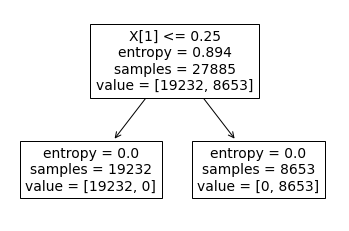

In [30]:
# visualizing tree 
dtree= DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
tree.plot_tree(dtree)

In [31]:
confusion_matrix(y_test, y_pred)

array([[4748,    0],
       [   0, 2224]])

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4748
           1       1.00      1.00      1.00      2224

    accuracy                           1.00      6972
   macro avg       1.00      1.00      1.00      6972
weighted avg       1.00      1.00      1.00      6972



In [33]:
#finding precision,recall,accuracy
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


# Regression

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [37]:
pip install openpyxl

  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [38]:
df = pd.read_excel('/home/joseph/Desktop/ml lab/lab1/dataset/CCPP/Folds5x2_pp.xlsx')

In [39]:
input = df.drop(['AP','V','RH'], axis=1)

In [40]:
input = input.dropna()
#dropping the null values
input.head()
#printing the head

,AT,PE
0,14.96,463.26
1,25.18,444.37
2,5.11,488.56
3,20.86,446.48
4,10.82,473.90


In [41]:
X = input.iloc[:, :-1].values
y = input.iloc[:, 1].values

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)

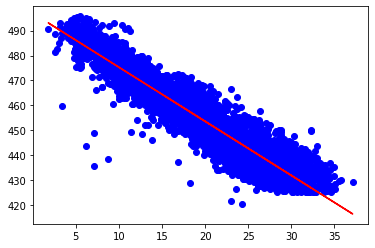

In [43]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')

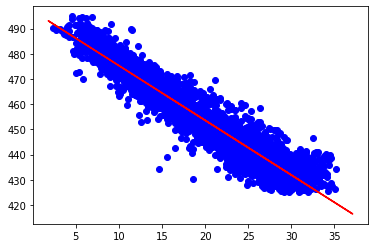

In [44]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.show()

In [46]:
df = pd.read_csv('/home/joseph/Desktop/ml lab/lab1/dataset/hcvdat0.csv')

In [47]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [48]:
df = df.drop(['Unnamed: 0'], axis = 'columns')
df = df.dropna()
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [49]:
df.Category.value_counts(normalize = True)


0=Blood Donor             0.893039
3=Cirrhosis               0.040747
1=Hepatitis               0.033956
2=Fibrosis                0.020374
0s=suspect Blood Donor    0.011885
Name: Category, dtype: float64

In [50]:
num_male = df.Sex.value_counts().loc['m']
num_female = df.Sex.value_counts().loc['f']
print('Number of males: {}'.format(num_male))
print('Number of females: {}'.format(num_female))

Number of males: 363
Number of females: 226


Largest part of my DataFrame is made of by healthy blood donors and only a rough 10% of people with the disease. This might be an issue for the accuracy later on in the model fitting, since that 10% is to be divided by all 3 possible stages of the disease. Male and female however in roughly 3 by 2 ratio

In [51]:
df_grp = df.groupby(['Sex', 'Category'])


In [52]:
print('Percentage of diseased females: {:.2%}'.format((num_female - len(df_grp.get_group(('f', '0=Blood Donor'))))/len(df_grp.get_group(('f', '0=Blood Donor')))))
print('Percentage of diseased males: {:.2%}'.format((num_male - len(df_grp.get_group(('m', '0=Blood Donor'))))/len(df_grp.get_group(('m', '0=Blood Donor')))))

Percentage of diseased females: 8.13%
Percentage of diseased males: 14.51%


In the above calculation i considered the worst case scenario where a "suspect blood donor" is considered as diseased. However they impact only for a 1% in total so negligible for the purpose of the study.

In [53]:
df.describe() 

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,47.417657,41.624278,68.123090,26.575382,33.772835,11.018166,8.203633,5.391341,81.669100,38.198472,71.890153
std,9.931334,5.761794,25.921072,20.863120,32.866871,17.406572,2.191073,1.128954,50.696991,54.302407,5.348883
min,23.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000
50%,47.000000,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000
75%,54.000000,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000
max,77.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.500000


In [54]:
from sklearn.preprocessing import LabelEncoder
le_Category = LabelEncoder()
le_Sex = LabelEncoder()
dfle = df.copy()


dfle.Category = le_Category.fit_transform(dfle.Category)
dfle.Sex = le_Sex.fit_transform(dfle.Sex)

In [55]:
X = dfle.drop(['Category'], axis = 'columns')
y = dfle.Category
X

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
608,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,59,0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [58]:
y


0      0
1      0
2      0
3      0
4      0
      ..
608    4
609    4
610    4
611    4
612    4
Name: Category, Length: 589, dtype: int64

In [59]:
from sklearn.linear_model import LogisticRegression


In [60]:

model_param = {

    
    'LogisticRegression':{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'param': {
            'C': [1,5,10,15,20]
        }
        
    },
    
 
    'DecisionTreeClassifier':{
        'model': DecisionTreeClassifier(),
        'param': {
            'criterion': ['gini','entropy'],
        }
    },
    
 
    
}


In [61]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_param.items():
    clf = GridSearchCV(mp['model'], mp['param'], cv=5, return_train_score=None)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [62]:
dataframe = pd.DataFrame(scores)
dataframe.sort_values(by=['best_score'], inplace = True, ascending=False)
dataframe

,model,best_score,best_params
0,LogisticRegression,0.943966,{'C': 1}
1,DecisionTreeClassifier,0.932059,{'criterion': 'gini'}


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
lr = LogisticRegression(solver='liblinear',multi_class='auto', C=1)
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)
score = lr.score(X_test, y_test)
print('Logistic Regression model has {:.2%} accuracy'.format(score))

Logistic Regression model has 94.07% accuracy


Text(0.5, 1.0, 'LR Confusion matrix')

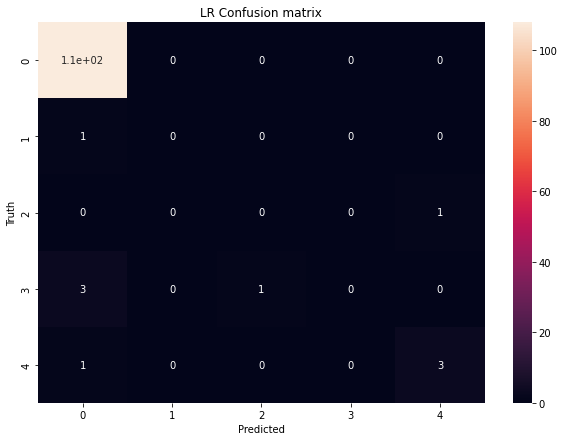

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr_prediction)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('LR Confusion matrix')

From the results above, I can see that all of the methods adopted in this study can predict with the same lavel of accuracy (>>90%). The Logistic regression, performs slightly better in terms of score other than approaches do.
However that level of accuracy refers mostly respect to blood donors than hepatitis due to the fact that most of our samples belong to healthy individuals. Few errors appears when it comes of disease data ans seen in the confusion matrix. That means that in order to properly predict the disease we need more samples with that particular disease and less NaN within the dataset